<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/Digit_identification_using_simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

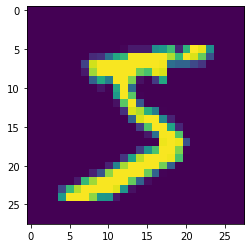

In [8]:
plt.imshow(X_train[0])

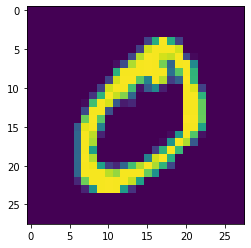

In [9]:
plt.imshow(X_train[1])

In [10]:
X_test.max()

255

In [0]:
X_test=X_test/255.0
X_train=X_train/255.0

In [0]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [13]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,input_shape=X_train[0].shape,activation='relu'))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(3))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,batch_size=50,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1200/1200 [==============================] - 228s 190ms/step - loss: 0.2445 - accuracy: 0.9246 - val_loss: 0.0439 - val_accuracy: 0.9869
Epoch 2/5
1200/1200 [==============================] - 228s 190ms/step - loss: 0.0990 - accuracy: 0.9708 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 3/5
1200/1200 [==============================] - 228s 190ms/step - loss: 0.0787 - accuracy: 0.9771 - val_loss: 0.0332 - val_accuracy: 0.9881
Epoch 4/5
1200/1200 [==============================] - 227s 189ms/step - loss: 0.0687 - accuracy: 0.9796 - val_loss: 0.0318 - val_accuracy: 0.9893
Epoch 5/5
1200/1200 [==============================] - 227s 189ms/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0263 - val_accuracy: 0.9912


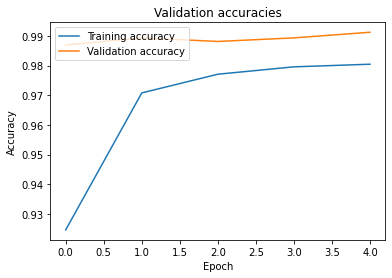

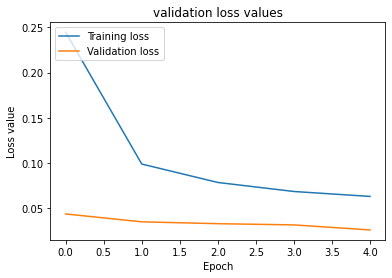

In [18]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()